# Food Delivery Time Predictions Analysis

🧾 Problem Statement
In the modern food delivery industry, ensuring timely and accurate deliveries is critical for maintaining customer satisfaction and operational efficiency. However, food delivery times can vary significantly due to multiple dynamic factors such as traffic conditions, weather, delivery distance, delivery personnel characteristics, and restaurant preparation times.

Currently, many food delivery platforms provide estimated delivery times based on rough heuristics, which often leads to inaccurate predictions. These inaccuracies can result in poor customer experience, reduced trust in the platform, and logistical inefficiencies.

This project aims to develop a machine learning model that accurately predicts food delivery times using historical data. The model will take into account various features such as the delivery person's age and ratings, order and delivery locations, and time-related variables. By applying regression algorithms and evaluating performance using metrics like Mean Squared Error (MSE) and R-squared (R²), the goal is to create a robust and scalable predictive system .

The final model will help businesses:

* Provide more accurate delivery time estimates to the customer based on their respective address.
* Improve resource planning and delivery scheduling.
* Enhance customer satisfaction and trust.

## Import Libraries

In [1]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from geopy.distance import geodesic


from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

## Loading the Data from the  Sqlite Database

In [2]:
conn= sqlite3.connect('D:\\Grow Data Skill\\food_delivery.db')

tables=pd.read_sql_query("Select name from sqlite_master where type= 'table' ",conn)
tables

,name
0,food_delivery_data


In [3]:
# dataframe
table_name=tables.loc[0,'name']
df=pd.read_sql(f"select  *  from {table_name}",conn)
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


In [4]:
# Count the total no of rows and columns
df.shape

(45593, 20)

* The Food Delivery table consist of 45593 records and 20 columns.

In [5]:
# checking the info of data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [6]:
# exploring the dataype
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age             object
Delivery_person_Ratings         object
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weatherconditions               object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries             object
Festival                        object
City                            object
Time_taken(min)                 object
dtype: object

In [7]:
# removing the duplicates
df.drop_duplicates()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


In [8]:
# unique value within each columns
for col in df.columns:
    print(f"Unique Values in column {col}: {df[col].nunique()}")

Unique Values in column ID: 45593
Unique Values in column Delivery_person_ID: 1320
Unique Values in column Delivery_person_Age: 23
Unique Values in column Delivery_person_Ratings: 29
Unique Values in column Restaurant_latitude: 657
Unique Values in column Restaurant_longitude: 518
Unique Values in column Delivery_location_latitude: 4373
Unique Values in column Delivery_location_longitude: 4373
Unique Values in column Order_Date: 44
Unique Values in column Time_Orderd: 177
Unique Values in column Time_Order_picked: 193
Unique Values in column Weatherconditions: 7
Unique Values in column Road_traffic_density: 5
Unique Values in column Vehicle_condition: 4
Unique Values in column Type_of_order: 4
Unique Values in column Type_of_vehicle: 4
Unique Values in column multiple_deliveries: 5
Unique Values in column Festival: 3
Unique Values in column City: 4
Unique Values in column Time_taken(min): 45


In [9]:
# chekcing the summary statistics of  numerical features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Restaurant_latitude,45593.0,17.017729,8.185109,-30.905562,12.933284,18.546947,22.728163,30.914057
Restaurant_longitude,45593.0,70.231332,22.883647,-88.366217,73.170000,75.898497,78.044095,88.433452
Delivery_location_latitude,45593.0,17.465186,7.335122,0.010000,12.988453,18.633934,22.785049,31.054057
Delivery_location_longitude,45593.0,70.845702,21.118812,0.010000,73.280000,76.002574,78.107044,88.563452
Vehicle_condition,45593.0,1.023359,0.839065,0.000000,0.000000,1.000000,2.000000,3.000000


In [10]:
# checking the summary statisitcs of categorical features
df.describe(include='object').T

,count,unique,top,freq
ID,45593,45593,0x5fb2,1
Delivery_person_ID,45593,1320,JAPRES11DEL02,67
Delivery_person_Age,45593,23,35,2262
Delivery_person_Ratings,45593,29,4.8,7148
Order_Date,45593,44,15-03-2022,1192
Time_Orderd,45593,177,NaN,1731
Time_Order_picked,45593,193,21:30:00,496
Weatherconditions,45593,7,conditions Fog,7654
Road_traffic_density,45593,5,Low,15477
Type_of_order,45593,4,Snack,11533


**Observations:**
1. There are null values present in Time_Orderd column.
2. Data Formatting will be required for Weatherconditions & Time_taken(min) column.
2. Both numerical & categorical features are present.
3. ID & Delivery_person_ID will not be used to build the model. 

# Data Cleaning

In [11]:
#Update Column Names
def update_column_name(df):
    #Renaming Weatherconditions column
    df.rename(columns={'Weatherconditions': 'Weather_conditions'},inplace=True)
    
update_column_name(df)
print(df.columns)

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')


In [12]:
# Extract relevant values from column
def extract_column_value(df):
    # Extract time and convert to int
    df['Time_taken(min)']=df['Time_taken(min)'].apply(lambda x: int(x.split(' ')[1].strip()))
    # Extract Weather Conditions
    df['Weather_conditions']=df['Weather_conditions'].apply(lambda x:x.split(' ')[1].strip())
    # Extract city code from Delivery Person ID
    df['City_code']=df['Delivery_person_ID'].str.split("RES",expand=True)[0]

extract_column_value(df)
df[['Time_taken(min)','Weather_conditions','City_code']].head()

,Time_taken(min),Weather_conditions,City_code
0,24,Sunny,INDO
1,33,Stormy,BANG
2,26,Sandstorms,BANG
3,21,Sunny,COIMB
4,30,Cloudy,CHEN


In [13]:
# dropping the unwanted column for building model
def drop_columns(df):
    df.drop(['ID','Delivery_person_ID'],axis=1,inplace=True)

print("Before No. of columns:",df.shape[1])
drop_columns(df)
print("After No of columns:",df.shape[1])

Before No. of columns: 21
After No of columns: 19


In [14]:
# Check for Duplicate Values
if (len(df[df.duplicated()])>0):
    print("There are Duplicate values present")
else:
    print("There is no duplicate value present")

There is no duplicate value present


In [15]:
# Update Datatypes
def update_datatype(df):
    """ converting the "Delivery_person_age","delivery_person_ratings" , "mutli_deliveries" and "Order_date" into   float and  Datetime datatype"""
    df['Delivery_person_Age']=df['Delivery_person_Age'].astype('float64')
    df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].astype('float64')
    df['multi_deliveries']=df['multiple_deliveries'].astype('float64')
    df['Order_Date']=pd.to_datetime(df['Order_Date'],format='%d-%m-%Y')

update_datatype(df)

In [16]:
# Convert String "NaN" to np.nan
def convert_nan(df):
    df.replace('NaN', np.nan, regex=True, inplace=True)
    # Convert to float first, then use nullable integer type
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('float')
    df['Delivery_person_Age'] = df['Delivery_person_Age'].astype('Int64')  # Nullable integer

convert_nan(df)

In [17]:
df['Delivery_person_Age'].unique()

<IntegerArray>
[  37,   34,   23,   38,   32,   22,   33,   35,   36,   21,   24,   29,   25,
   31,   27,   26,   20, <NA>,   28,   39,   30,   15,   50]
Length: 23, dtype: Int64

In [18]:
# check null value(pct of total values)
(df.isnull().sum().sort_values(ascending=False)/len(df)) * 100

Delivery_person_Ratings        4.184853
Delivery_person_Age            4.066414
Time_Orderd                    3.796635
City                           2.631983
multiple_deliveries            2.177966
multi_deliveries               2.177966
Weather_conditions             1.351085
Road_traffic_density           1.318185
Festival                       0.500077
Restaurant_latitude            0.000000
Restaurant_longitude           0.000000
Delivery_location_latitude     0.000000
Vehicle_condition              0.000000
Time_Order_picked              0.000000
Delivery_location_longitude    0.000000
Order_Date                     0.000000
Type_of_order                  0.000000
Type_of_vehicle                0.000000
Time_taken(min)                0.000000
City_code                      0.000000
dtype: float64

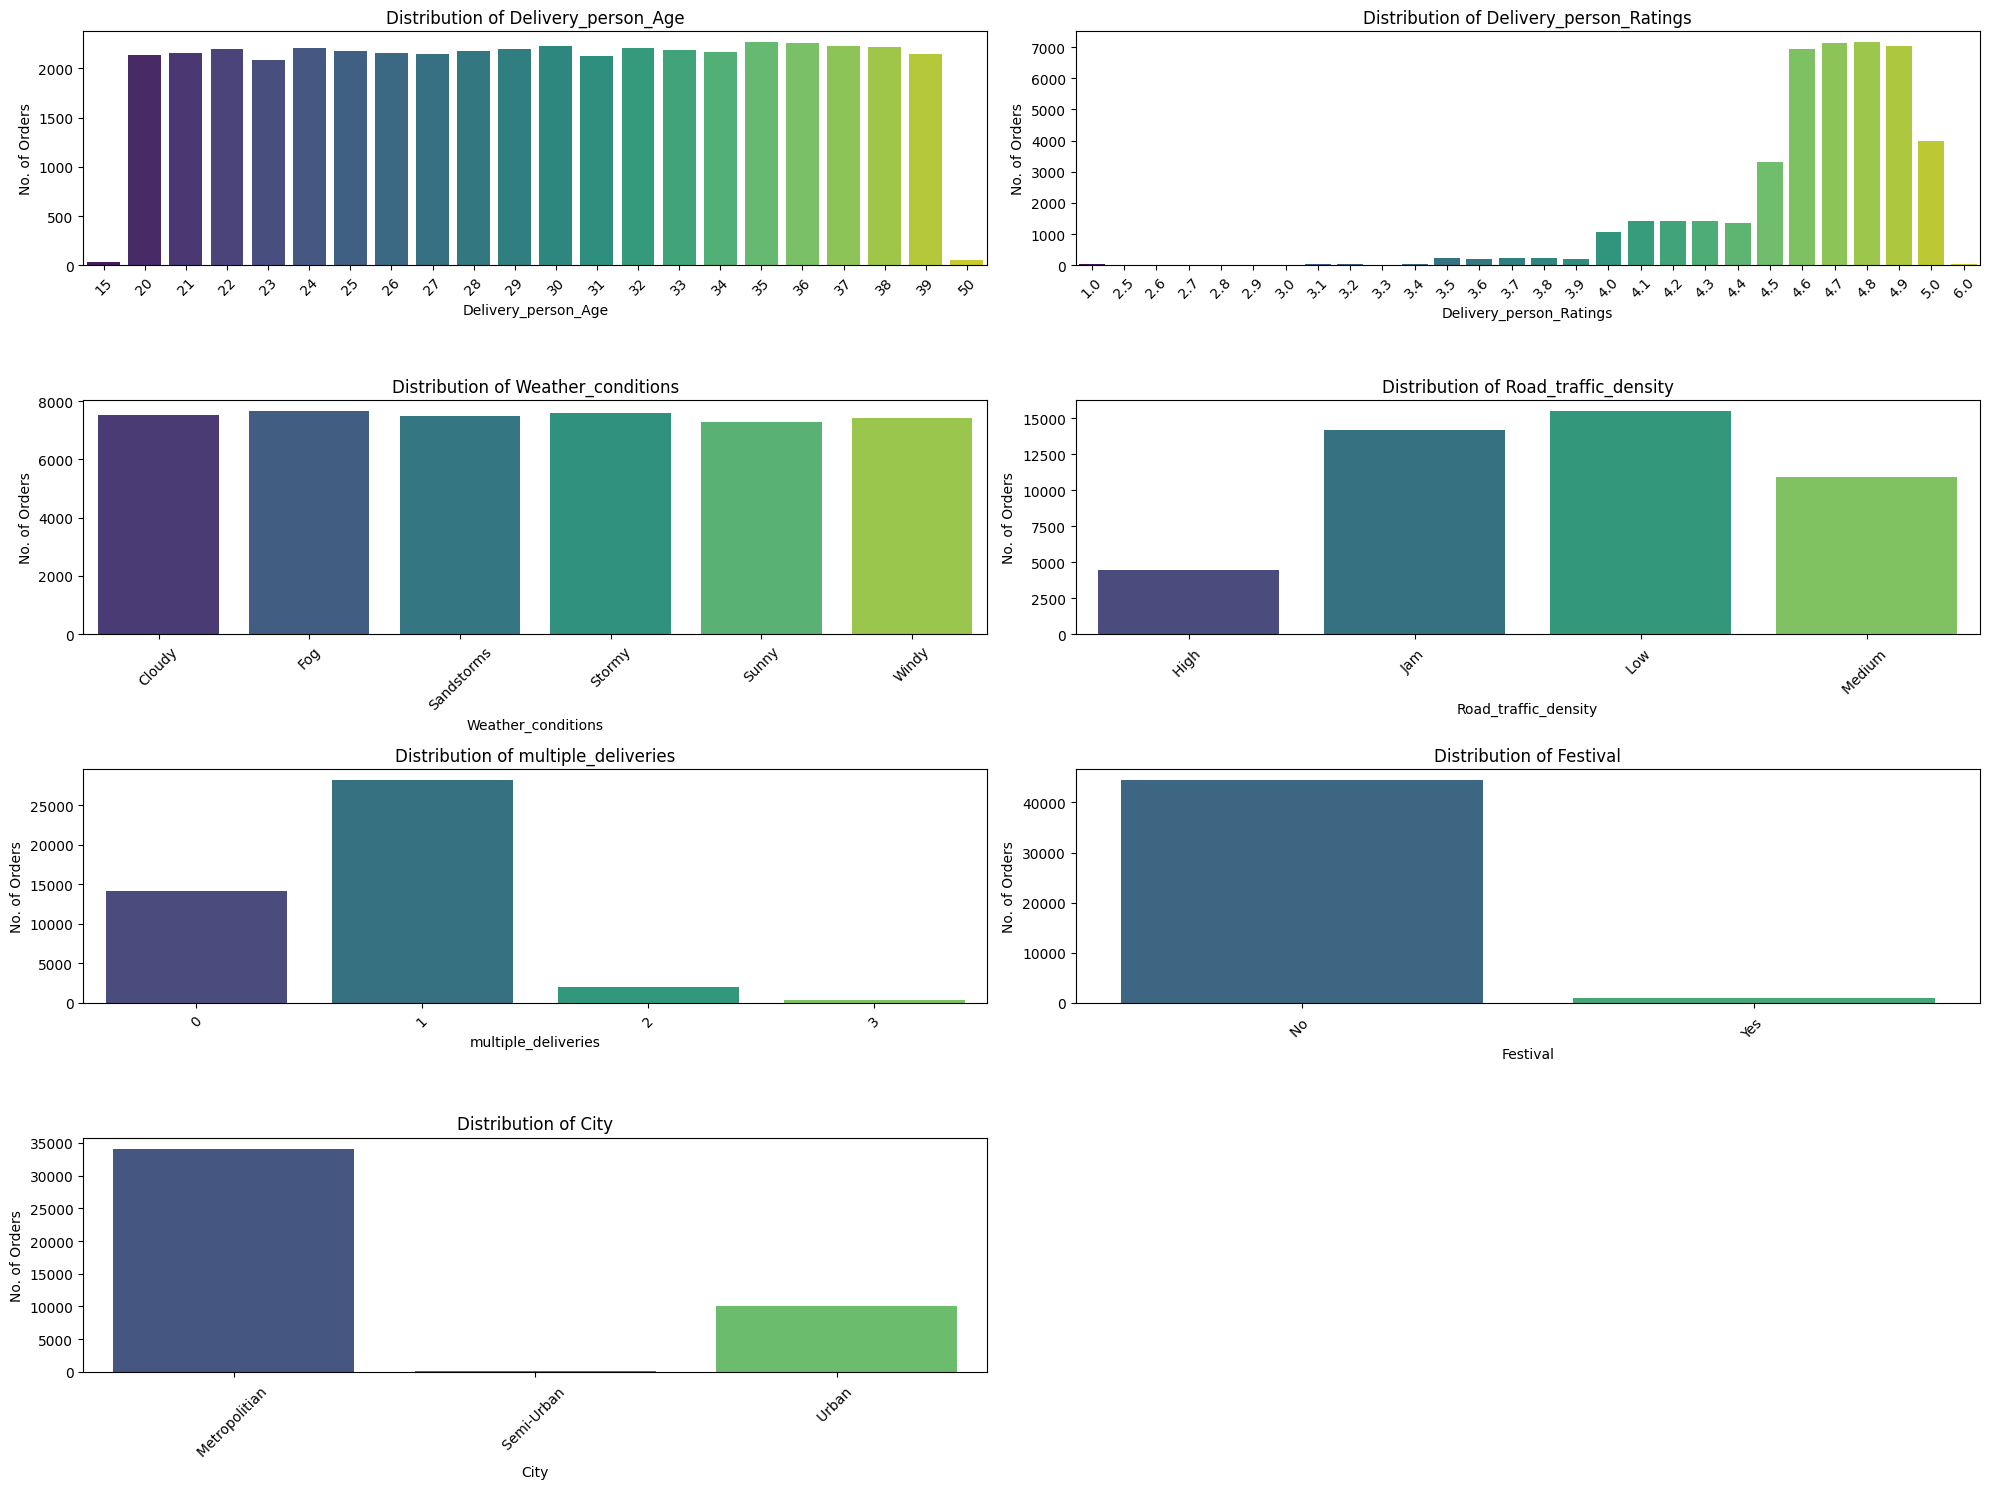

In [19]:
# Explore the column that have null values
class NullValueAnalyzer:
    def __init__(self, dataframe):
        self.df = dataframe
        self.null_columns = ['Delivery_person_Age', 'Delivery_person_Ratings',
                            'Weather_conditions', 'Road_traffic_density',
                            'multiple_deliveries', 'Festival', 'City']
    
    def create_countplots(self, figsize=(20, 15), rotation=45):
        """Create countplots for all null value columns"""
        num_plots = len(self.null_columns)
        nrows = -(-num_plots // 2)  # Ceiling division
        
        fig, axes = plt.subplots(nrows, 2, figsize=figsize)
        axes = axes.flatten() if nrows > 1 else [axes] if nrows == 1 else axes
        
        for i, column in enumerate(self.null_columns):
            self._plot_single_column(column, axes[i], rotation)
        
        # Hide unused subplots
        for j in range(i + 1, len(axes)):
            axes[j].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    
    def _plot_single_column(self, column, ax, rotation):
        """Plot a single column's countplot"""
        order = self.df[column].value_counts().sort_index().index
        sns.countplot(data=self.df, x=column, order=order, ax=ax,palette='viridis')
        
        ax.set_xlabel(column)
        ax.set_ylabel('No. of Orders')
        ax.set_title(f'Distribution of {column}')
        ax.tick_params(axis='x', rotation=45)

# Usage
analyzer = NullValueAnalyzer(df)
analyzer.create_countplots()


In [20]:
# Handle the null Values 
def handle_null_values(df):
    df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].median(),inplace=True)
    df['Weather_conditions'].fillna(np.random.choice(df['Weather_conditions']),inplace=True)
    df['City'].fillna(df['City'].mode()[0],inplace=True)
    df['Festival'].fillna(df['Festival'].mode()[0],inplace=True)
    df['multi_deliveries'].fillna(df['multi_deliveries'].mode()[0],inplace=True)
    df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0],inplace=True)
    df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].median(),inplace=True)
    
    

handle_null_values(df)
df.isnull().sum()

Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                          0
City                              0
Time_taken(min)                   0
City_code                         0
multi_deliveries                  0
dtype: int64

# Feature Engineering

In [21]:
def extract_date_features(data):
    data['day']=data.Order_Date.dt.day
    data['month']=data.Order_Date.dt.month
    data['quarter'] = data.Order_Date.dt.quarter
    data['year']=data.Order_Date.dt.year 
    data['day_of_week']=data.Order_Date.dt.day_of_week.astype(int)
    data['is_month_start']=data.Order_Date.dt.is_month_start.astype(int)
    data['is_month_end']=data.Order_Date.dt.is_month_end.astype(int)
    data['is_quarter_start'] = data.Order_Date.dt.is_quarter_start.astype(int)
    data['is_quarter_end'] = data.Order_Date.dt.is_quarter_end.astype(int)
    data['is_year_start'] = data.Order_Date.dt.is_year_start.astype(int)
    data['is_year_end'] = data.Order_Date.dt.is_year_end.astype(int)
    data['is_weekend'] = np.where(data['day_of_week'].isin([5,6]),1,0)

extract_date_features(df)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1


In [22]:
df

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,...,quarter,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,Sunny,...,1,2022,5,0,0,0,0,0,0,1
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,Stormy,...,1,2022,4,0,0,0,0,0,0,0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,Sandstorms,...,1,2022,5,0,0,0,0,0,0,1
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,Sunny,...,2,2022,1,0,0,0,0,0,0,0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,Cloudy,...,1,2022,5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,Windy,...,1,2022,3,0,0,0,0,0,0,0
45589,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,Windy,...,1,2022,2,0,0,0,0,0,0,0
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,Cloudy,...,1,2022,4,0,0,0,0,0,0,0
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,Cloudy,...,1,2022,0,0,0,0,0,0,0,0


In [23]:
# Calculate Time Difference
def calculate_time_diff(df):
    # Find the difference between Ordered time & Picked Time
    df['Time_Orderd']=pd.to_timedelta(df['Time_Orderd'])

    df['Time_Order_picked']=pd.to_timedelta(df['Time_Order_picked'])

    # Adding a 1 day to pickup time where it is less than the order time
    df['Time_Order_picked_new']=df['Order_Date'] + np.where(df['Time_Order_picked'] < df['Time_Orderd'], pd.DateOffset(days=1), pd.DateOffset(days=0)) + df['Time_Order_picked']

    df['Time_Orderd_new'] =  df['Order_Date'] + df['Time_Orderd']

    df['Time_Order_picked_new']=pd.to_datetime(df['Time_Order_picked_new'])

    df['order_prepare_time'] = (df['Time_Order_picked_new'] - df['Time_Orderd_new']).dt.total_seconds() / 60

    # Handling the null values by filling with the median
    df['order_prepare_time'].fillna(df['order_prepare_time'].median(),inplace=True)

    # drop all the time & date related columns
    df.drop(['Time_Orderd','Time_Order_picked','Time_Orderd_new','Time_Order_picked_new','Order_Date'],axis=1,inplace=True)

calculate_time_diff(df)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,2022,4,0,0,0,0,0,0,0,5.0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,2022,5,0,0,0,0,0,0,1,15.0
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,2022,1,0,0,0,0,0,0,0,10.0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,2022,5,0,0,0,0,0,0,1,15.0


In [24]:
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,year,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,2022,5,0,0,0,0,0,0,1,15.0
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,2022,4,0,0,0,0,0,0,0,5.0
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,2022,5,0,0,0,0,0,0,1,15.0
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,2022,1,0,0,0,0,0,0,0,10.0
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,2022,5,0,0,0,0,0,0,1,15.0


In [25]:
# Calculate distance betwen restaurant location & delivery location
def calculate_distance(df):
    # Initalizing a Distance Column
    df['distance']=np.zeros(len(df))
    # Extracting restaurant ,delivery coordinates from this 
    restaurant_coordinates=df[['Restaurant_latitude','Restaurant_longitude']].to_numpy()
    delivery_location_coordinates=df[['Delivery_location_latitude','Delivery_location_longitude']].to_numpy()
    #  Caluclate the Geodesic Distance
    df['distance']=np.array([geodesic(restaurant,delivery) for restaurant,delivery in zip(restaurant_coordinates,delivery_location_coordinates)])
    df['distance']=df['distance'].astype('str').str.extract('(\d+)').astype("int64")
    df['distance']=df['distance'].round(2)

calculate_distance(df)
df.head()




,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,day_of_week,is_month_start,is_month_end,is_quarter_start,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance
0,37,4.9,22.745049,75.892471,22.765049,75.912471,Sunny,High,2,Snack,...,5,0,0,0,0,0,0,1,15.0,3
1,34,4.5,12.913041,77.683237,13.043041,77.813237,Stormy,Jam,2,Snack,...,4,0,0,0,0,0,0,0,5.0,20
2,23,4.4,12.914264,77.678400,12.924264,77.688400,Sandstorms,Low,0,Drinks,...,5,0,0,0,0,0,0,1,15.0,1
3,38,4.7,11.003669,76.976494,11.053669,77.026494,Sunny,Medium,0,Buffet,...,1,0,0,0,0,0,0,0,10.0,7
4,32,4.6,12.972793,80.249982,13.012793,80.289982,Cloudy,High,1,Snack,...,5,0,0,0,0,0,0,1,15.0,6


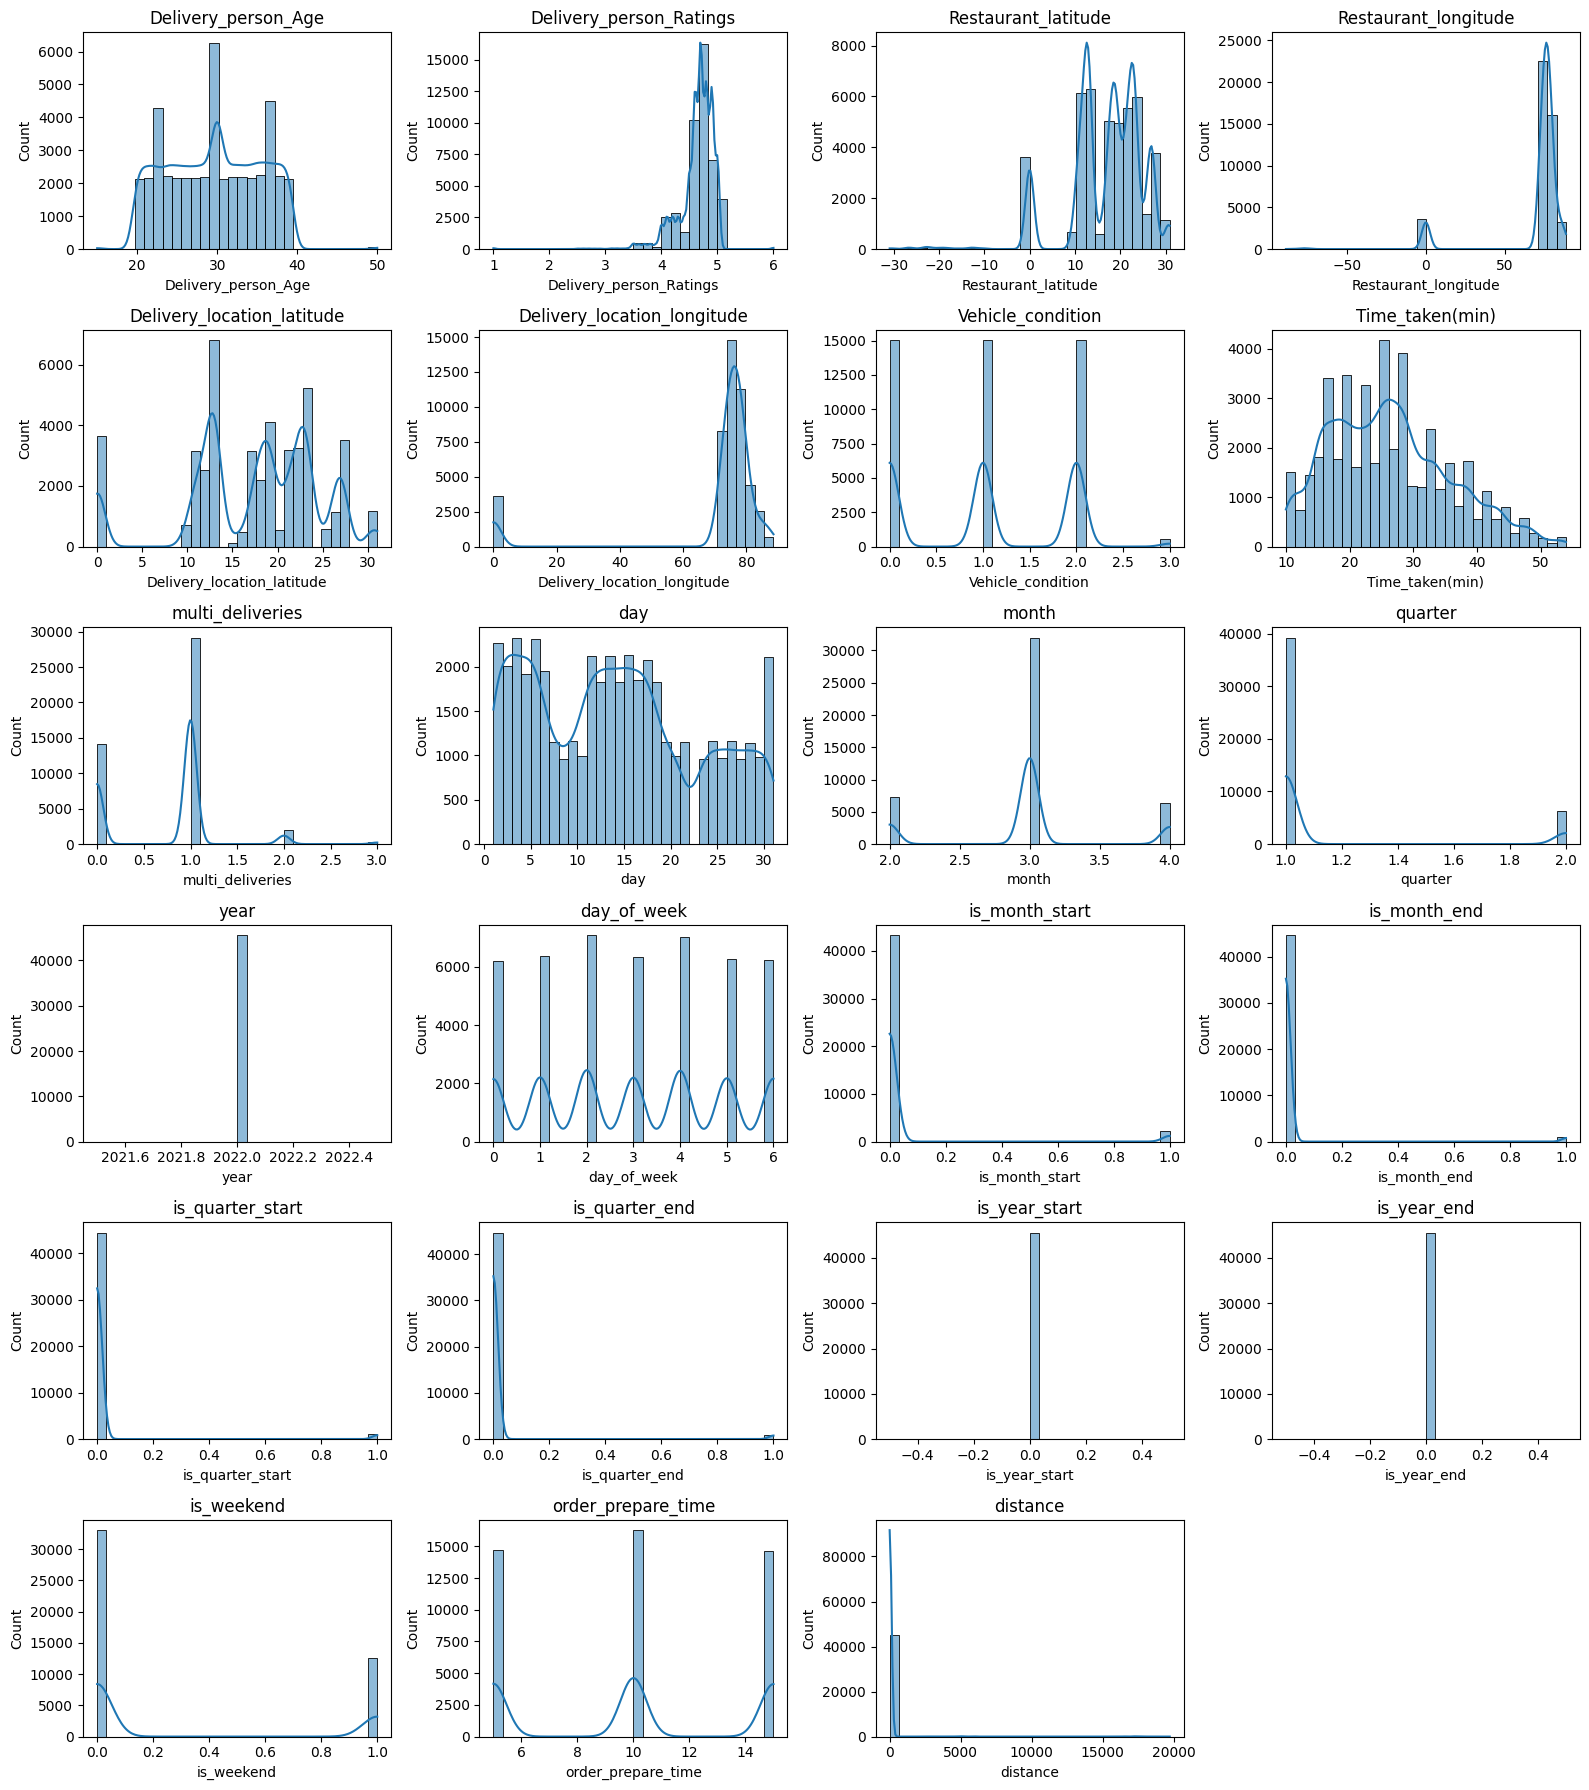

In [26]:
# Distribution Of Hist Plot for various Numerical Variable

import math
import matplotlib.pyplot as plt
import seaborn as sns

# Select numerical columns
numerical_col = df.select_dtypes(include='number').columns

# Subplot grid dimensions
n_cols = 4
n_rows = math.ceil(len(numerical_col) / n_cols)

# Create subplots using object-oriented interface
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_col):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(col)

# Hide unused subplots if any
for j in range(len(numerical_col), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


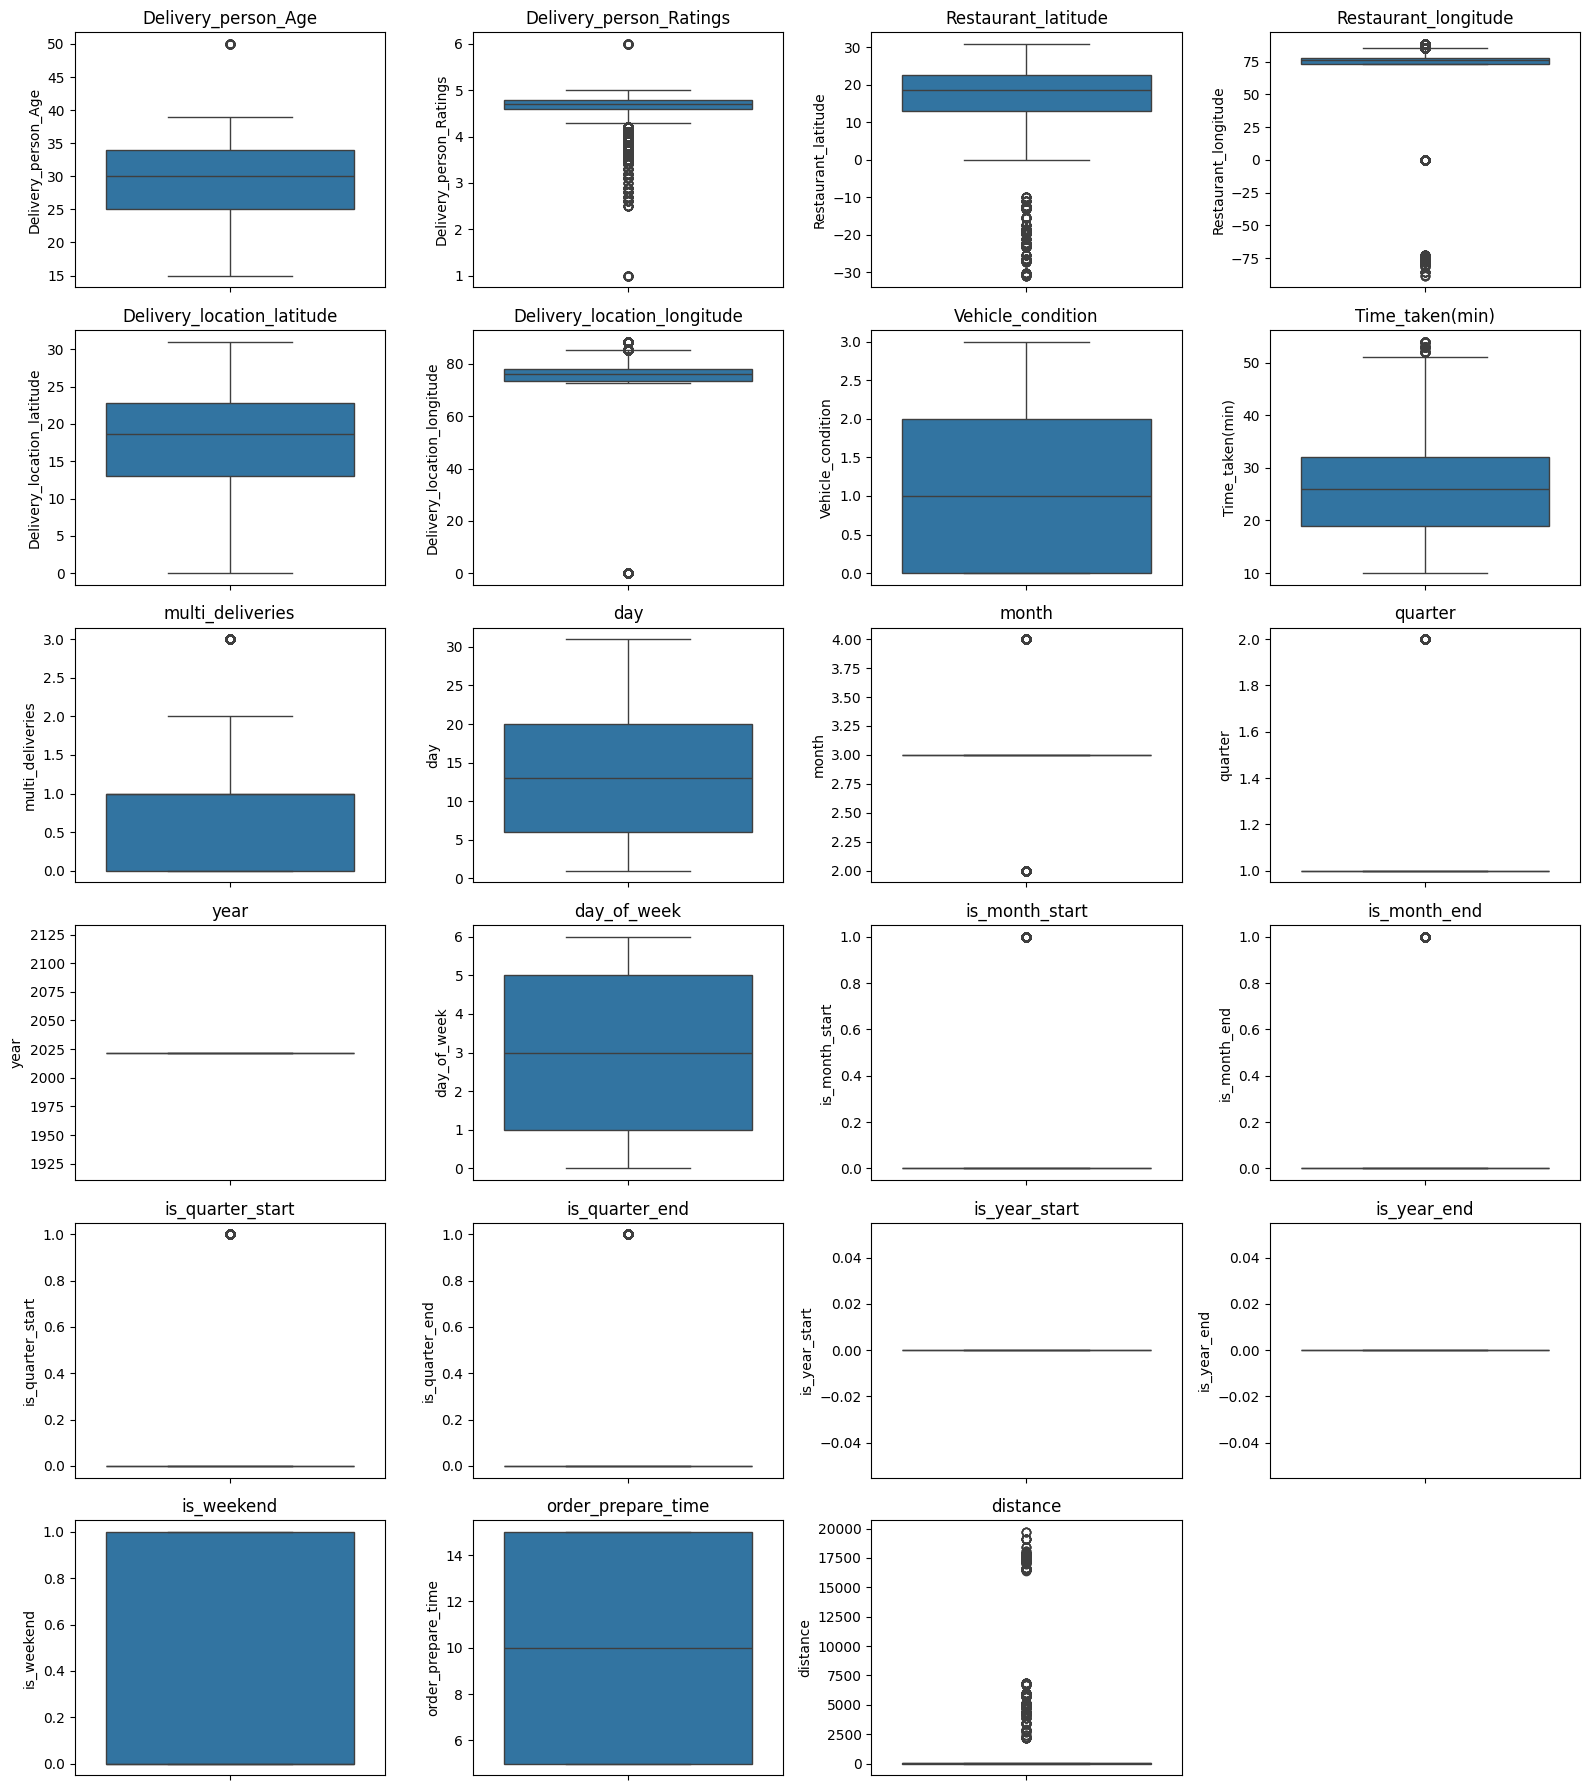

In [27]:
# Outliers Detection

# Select numerical columns
numerical_col = df.select_dtypes(include='number').columns

# Subplot grid dimensions
n_cols = 4
n_rows = math.ceil(len(numerical_col) / n_cols)

# Create subplots using object-oriented interface
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*4, n_rows*3))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each histogram
for i, col in enumerate(numerical_col):
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide unused subplots if any
for j in range(len(numerical_col), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [28]:
# save the cleaned dataset
df.to_csv('cleaned_dataset.csv',index=False)

# Exploratory Data Analysis

## 🧍 Demographics & Ratings


###  Does the age of the delivery person influence the average delivery time?

Figure 1: Delivery Time Insights vs Age Group


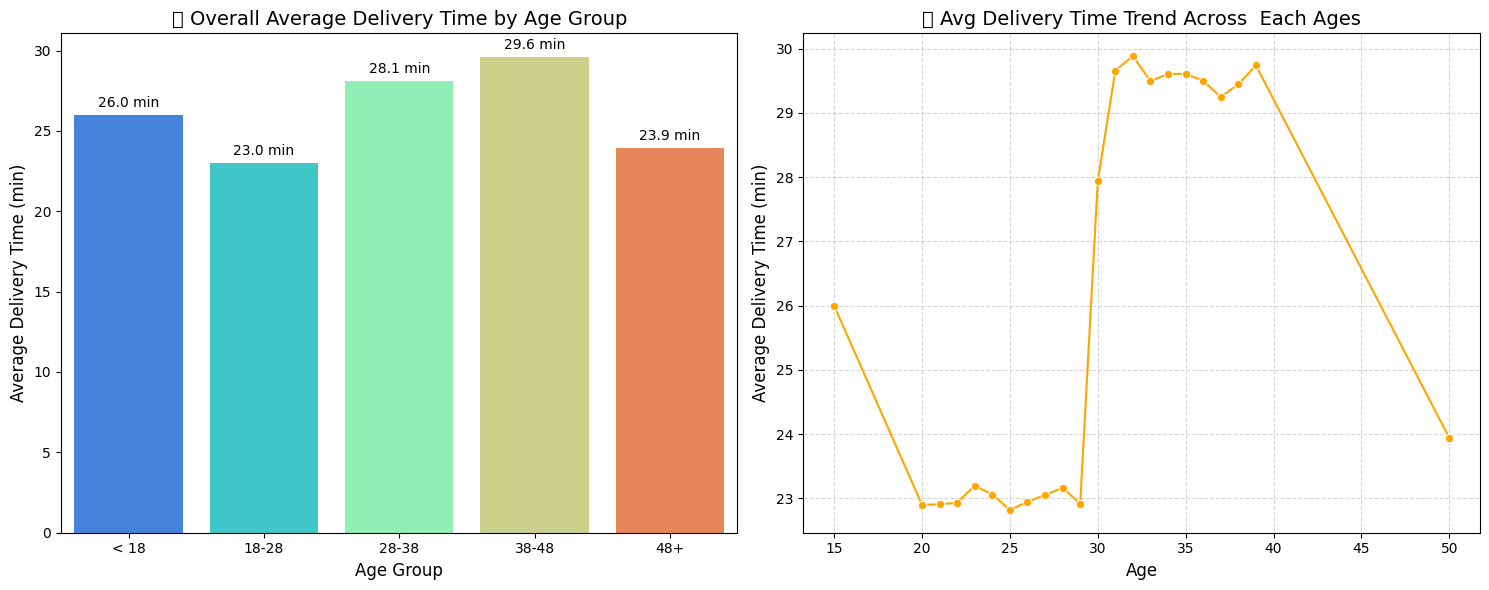


📊 Average Delivery Time per Age Group:
Age_Group  Time_taken(min)
     < 18        26.000000
    18-28        22.976600
    28-38        28.097303
    38-48        29.591336
      48+        23.943396

✅ Fastest Deliveries: 18-28 (23.0 min)
⚠️ Slowest Deliveries: 38-48 (29.6 min)


In [29]:
print("Figure 1: Delivery Time Insights vs Age Group")

# 1️⃣ Create Age Groups
bins = [0, 18, 28, 38, 48, float('inf')]
labels = ['< 18', '18-28', '28-38', '38-48', '48+']
df['Age_Group'] = pd.cut(df['Delivery_person_Age'], bins=bins, labels=labels, right=False, include_lowest=True)

# 2️⃣ Calculate Average Delivery Time per Age Group
avg_delivery_by_group = df.groupby('Age_Group')['Time_taken(min)'].mean().reset_index()

# 3️⃣ Prepare Lineplot Data: Average time vs age (continuous)
avg_time_by_age = df.groupby('Delivery_person_Age')['Time_taken(min)'].mean().reset_index()

# 4️⃣ Create Subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 📊 Bar Chart - Average Delivery Time by Age Group
sns.barplot(ax=axes[0], data=avg_delivery_by_group, x='Age_Group', y='Time_taken(min)', palette='rainbow')
axes[0].set_title('📦 Overall Average Delivery Time by Age Group', fontsize=14)
axes[0].set_xlabel('Age Group', fontsize=12)
axes[0].set_ylabel('Average Delivery Time (min)', fontsize=12)
for i, val in enumerate(avg_delivery_by_group['Time_taken(min)']):
    axes[0].text(i, val + 0.5, f"{val:.1f} min", ha='center', fontsize=10)

# 📈 Line Plot - Delivery Time vs Age
sns.lineplot(ax=axes[1], data=avg_time_by_age, x='Delivery_person_Age', y='Time_taken(min)', marker='o', color='orange')
axes[1].set_title('📈 Avg Delivery Time Trend Across  Each Ages', fontsize=14)
axes[1].set_xlabel('Age', fontsize=12)
axes[1].set_ylabel('Average Delivery Time (min)', fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 5️⃣ Print Summary
print("\n📊 Average Delivery Time per Age Group:")
print(avg_delivery_by_group.to_string(index=False))

# 6️⃣ Extra Insight: Best & Worst Age Groups
best_group = avg_delivery_by_group.loc[avg_delivery_by_group['Time_taken(min)'].idxmin()]
worst_group = avg_delivery_by_group.loc[avg_delivery_by_group['Time_taken(min)'].idxmax()]
print(f"\n✅ Fastest Deliveries: {best_group['Age_Group']} ({best_group['Time_taken(min)']:.1f} min)")
print(f"⚠️ Slowest Deliveries: {worst_group['Age_Group']} ({worst_group['Time_taken(min)']:.1f} min)")

**Insights:**
- Older Age Groups: The data indicates that older age groups (i.e., 38-48 years) experience longer delivery times, suggesting potential inefficiencies or different preferences within age demographic.
- Younger Age Group: Conversely, younger individuals (especially ages 18-28 and above 48) tend to have shorter delivery times, indicating a more efficient process or quicker decision-making.
- The overall trend suggests that as age increases, delivery times tend to increase. Exceptions are found in younger age groups who exhibit efficiency.


### Do higher-rated delivery personnel deliver faster than lower-rated ones?

Figure 1 : Avg Delivery time Distribution  Per Rating Type 


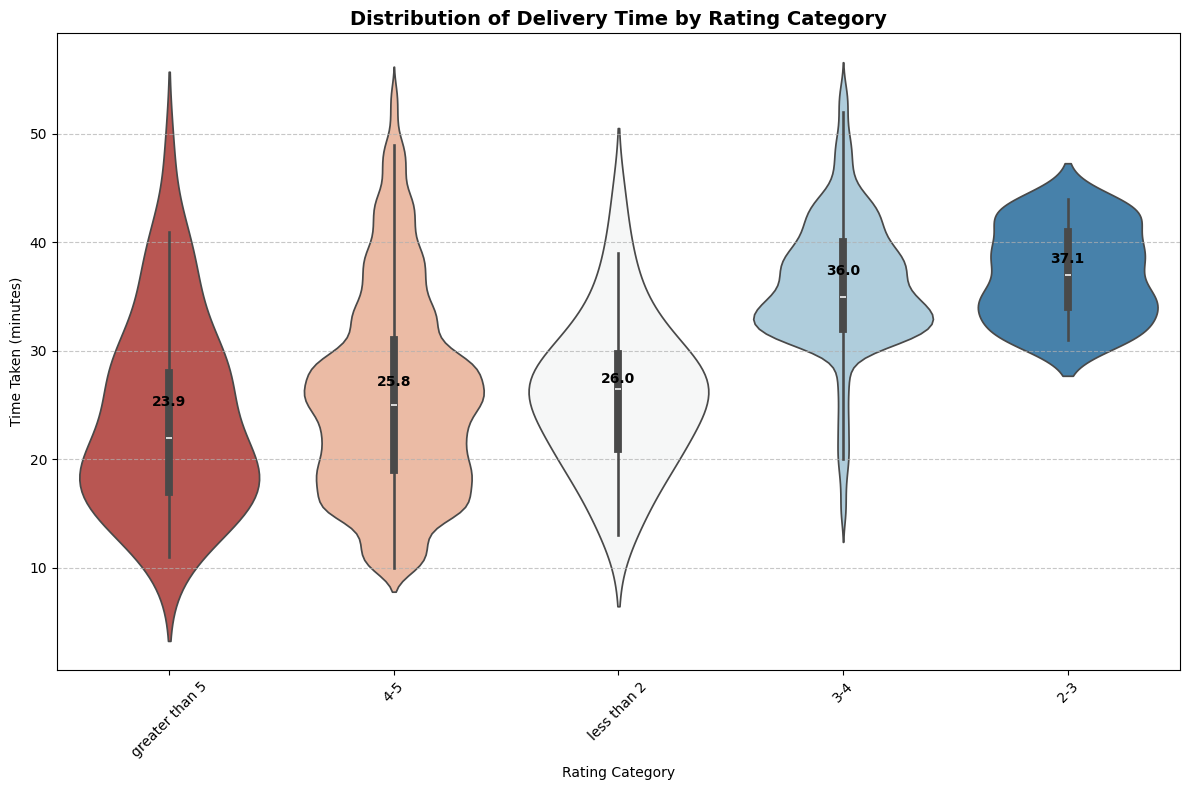

In [30]:
print("Figure 1 : Avg Delivery time Distribution  Per Rating Type ")

def group_of_person_on_rating(rating):
    if rating <=2 :
        return f"less than 2"
    elif 2 < rating <= 3:
        return f"2-3"
    elif 3< rating <= 4:
        return f"3-4"
    elif 4 < rating <= 5:
        return f"4-5"
    else:
        return f"greater than 5"
    
df['Rating_category']= df['Delivery_person_Ratings'].apply(group_of_person_on_rating)

# Grouping based on Rating in order tofind the avg deliveryt time
avg_time_per_rating= (df.groupby(df['Rating_category'])['Time_taken(min)'].mean().sort_values().reset_index())

# detailed Violinplot distribution
plt.figure(figsize=(12,8))
sns.violinplot(data=df,x=df['Rating_category'], y=df["Time_taken(min)"] ,order=avg_time_per_rating['Rating_category'],palette='RdBu')


# Step 3: Add labels for averages
for idx, row in avg_time_per_rating.iterrows():
    plt.text(
        idx,                               # X position
        row['Time_taken(min)'] + 1,         # Y position (slightly above point)
        f"{row['Time_taken(min)']:.1f}",    # Label text
        ha='center', fontsize=10, fontweight='bold', color='black'
    )

plt.title('Distribution of Delivery Time by Rating Category', fontsize=14, fontweight='bold')
plt.xlabel('Rating Category')
plt.ylabel('Time Taken (minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### **Insights**
- Ratings 4-5 and less than 2 show wider distributions, suggesting more variability in delivery times.
- Categories 3-4 and greater than 5 exhibit narrower distributions, indicating more consistent delivery times.
- The presence of outliers and range difference emphasizes the impact of customer ratings on delivery efficiency.

## 🚦 Road Traffic Density


### How does traffic congestion shift the distribution of delivery time, and does its effect vary across traffic levels?

Figure 3: Distibution of Avg Delivery Time over various Traffic Types 


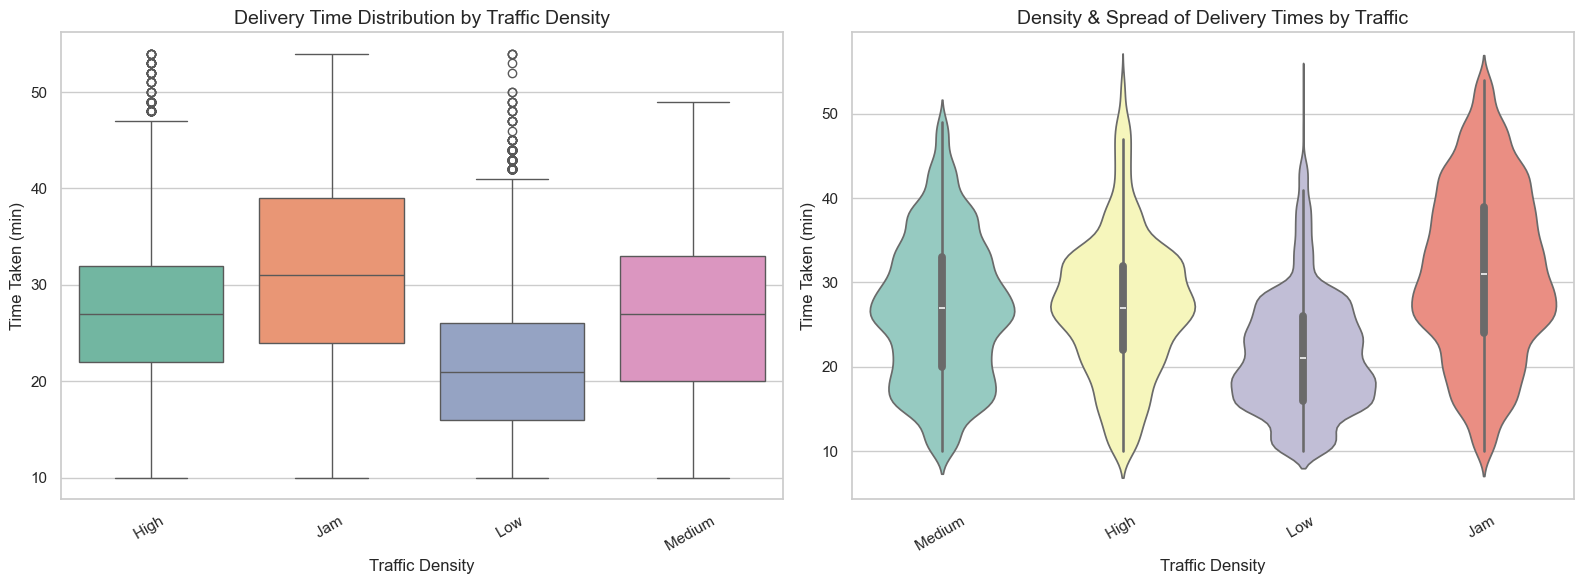

In [31]:
print(f"Figure 3: Distibution of Avg Delivery Time over various Traffic Types ")

# Set style
sns.set_theme(style="whitegrid", palette="Set2")


# Figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1️⃣ Boxplot - Delivery time by traffic level
sns.boxplot(
    x='Road_traffic_density',
    y='Time_taken(min)',
    data=df,
    ax=axes[0],
    palette="Set2",
)
axes[0].set_title("Delivery Time Distribution by Traffic Density", fontsize=14)
axes[0].set_xlabel("Traffic Density", fontsize=12)
axes[0].set_ylabel("Time Taken (min)", fontsize=12)
axes[0].tick_params(axis='x', rotation=30)

# 2️⃣ Violin plot - Density + distribution
sns.violinplot(
    x='Road_traffic_density',
    y='Time_taken(min)',
    data=df.sort_index(ascending=False),
    ax=axes[1],
    palette="Set3",
    
)
axes[1].set_title("Density & Spread of Delivery Times by Traffic", fontsize=14)
axes[1].set_xlabel("Traffic Density", fontsize=12)
axes[1].set_ylabel("Time Taken (min)", fontsize=12)
axes[1].tick_params(axis='x', rotation=30)

# Adjust layout
plt.tight_layout()
plt.show()

### **Insights:**
**Box Plots (Left Chart):**
- Delivery times are represented for four traffic densities: High, Jam, Low, and Medium.
- The Jam condition has the highest median delivery time (~40 min).
- High traffic shows a wider range of delivery times, indicated by the spread of the box.

**Violin Plots (Right Chart):**
- Similar traffic densities are compared, showing distribution shape alongside the median.
- Medium traffic has the narrowest spread, indicating more consistent delivery times.
- High traffic shows variability, highlighting unpredictability in delivery times under congested conditions.

## 🏙️ City

### Which cities have the fastest and slowest deliveries?

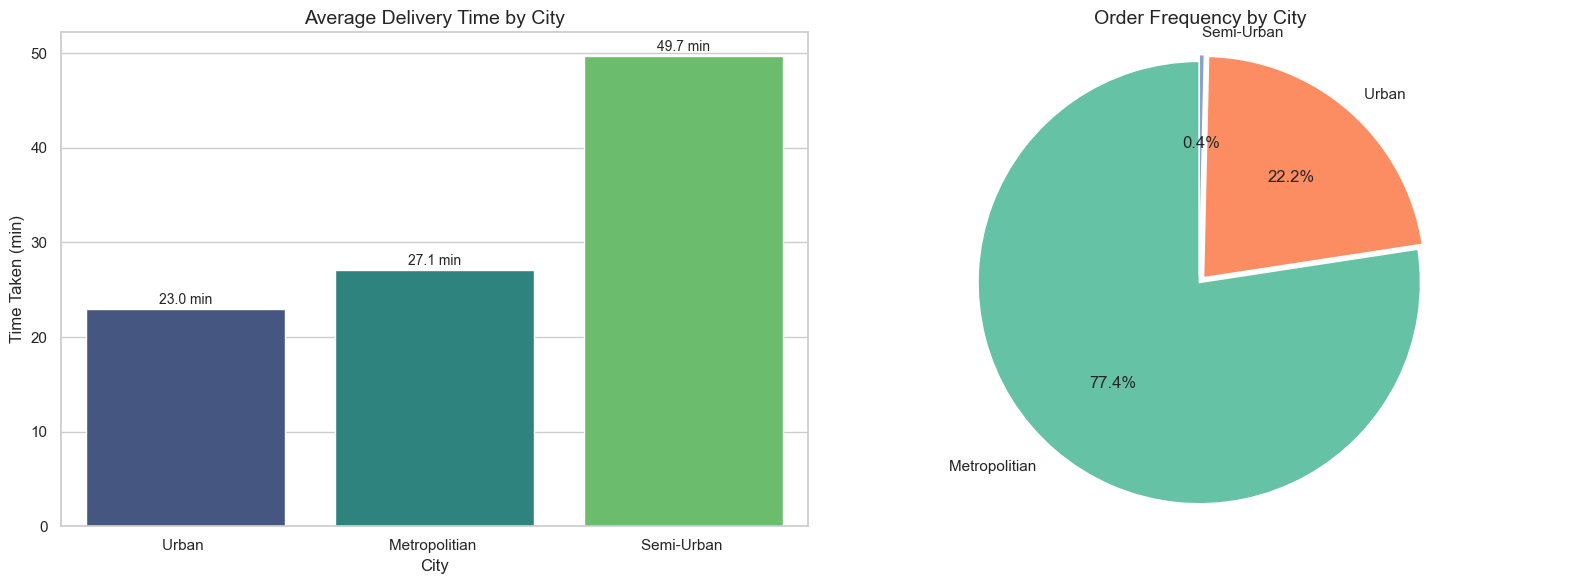

In [32]:
# 1️⃣ Average delivery time per city
city_time = df.groupby('City')['Time_taken(min)'].mean().sort_values()

# 2️⃣ Orders per city
city_counts = df['City'].value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Chart 1: Average Delivery Time by City (Bar Plot) ---
sns.barplot(
    x=city_time.index,
    y=city_time.values,
    palette="viridis",
    ax=axes[0]
)
axes[0].set_title("Average Delivery Time by City", fontsize=14)
axes[0].set_ylabel("Time Taken (min)")
axes[0].set_xlabel("City")
for i, val in enumerate(city_time.values):
    axes[0].text(i, val + 0.5, f"{val:.1f} min", ha='center', fontsize=10)

# --- Chart 2: Order Distribution by City (Pie Chart) ---
colors2 = sns.color_palette("Set2")[0:len(city_counts)]
axes[1].pie(
    city_counts,
    labels=city_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors2,
    wedgeprops={'edgecolor': 'white'},explode=[0,0.03,0.03]
)
axes[1].set_title("Order Frequency by City", fontsize=14)
axes[1].axis('equal')

# Layout adjustment
plt.tight_layout()
plt.show()

**Insights:**
**Average Delivery Time by City:**
- Urban: 23.0 minutes
- Metropolitan City: 27.1 minutes
- Semi-Urban: 49.7 minutes (longest delivery time)

**Order Frequency by City:**
- Metropolitan: 77.4% (highest frequency)
- Urban: 22.2%
- Semi-Urban: 0.4% (lowest frequency)

**Overall Insights:**
- Delivery times increase from Urban to Semi-Urban areas.
- Metropolitan areas have the highest order frequency, while Semi-Urban areas show minimal engagement.


## 🏍️ Vehicle Condition

### Does the condition of the vehicle impact delivery time?

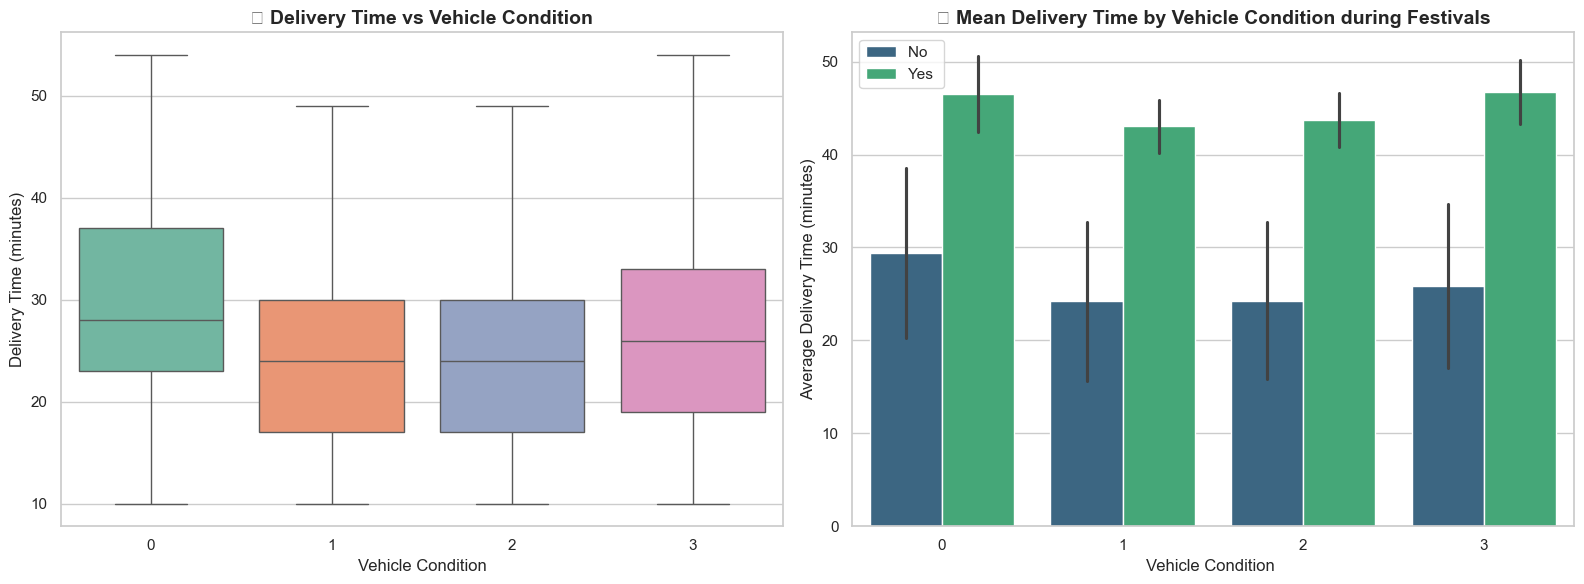

In [33]:
# Ensure delivery time is numeric
df['Time_taken(min)'] = pd.to_numeric(df['Time_taken(min)'], errors='coerce')

# Create figure & subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
sns.boxplot(
    x='Vehicle_condition',
    y='Time_taken(min)',
    data=df,
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title("🚚 Delivery Time vs Vehicle Condition", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Vehicle Condition")
axes[0].set_ylabel("Delivery Time (minutes)")

# Barplot (Mean + SD)
sns.barplot(
    x='Vehicle_condition',
    y='Time_taken(min)',
    data=df,
    palette='viridis',
    ci='sd',
    ax=axes[1],hue=df['Festival']
)
axes[1].set_title("📈 Mean Delivery Time by Vehicle Condition during Festivals", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Vehicle Condition ")
axes[1].set_ylabel("Average Delivery Time (minutes)")

plt.tight_layout()
plt.legend()
plt.show()


**Insights:**

**Delivery Time vs. Vehicle Condition (Left Chart):**
- Shows a box plot indicating variability in delivery times based on vehicle condition.
- Vehicle condition 0 has the highest median delivery time, while conditions 1, 2, and 3 are generally lower.The range of delivery times is wider for vehicle condition 0.

**Mean Delivery Time (Right Chart):**
- Displays average delivery times categorized by vehicle condition with two groups: "Yes" and "No."
- "Yes" group generally shows longer average delivery times compared to the "No" group across all vehicle conditions.
- Vehicle condition 2 exhibits the largest difference between the two categories.

Overall, vehicle condition influences delivery time, with higher delivery times associated with specific vehicle statuses.

## 📦 Multiple Deliveries

### 📌 Question: Is delivery time significantly affected by the number of deliveries being handled over Weekdays and Weekends?


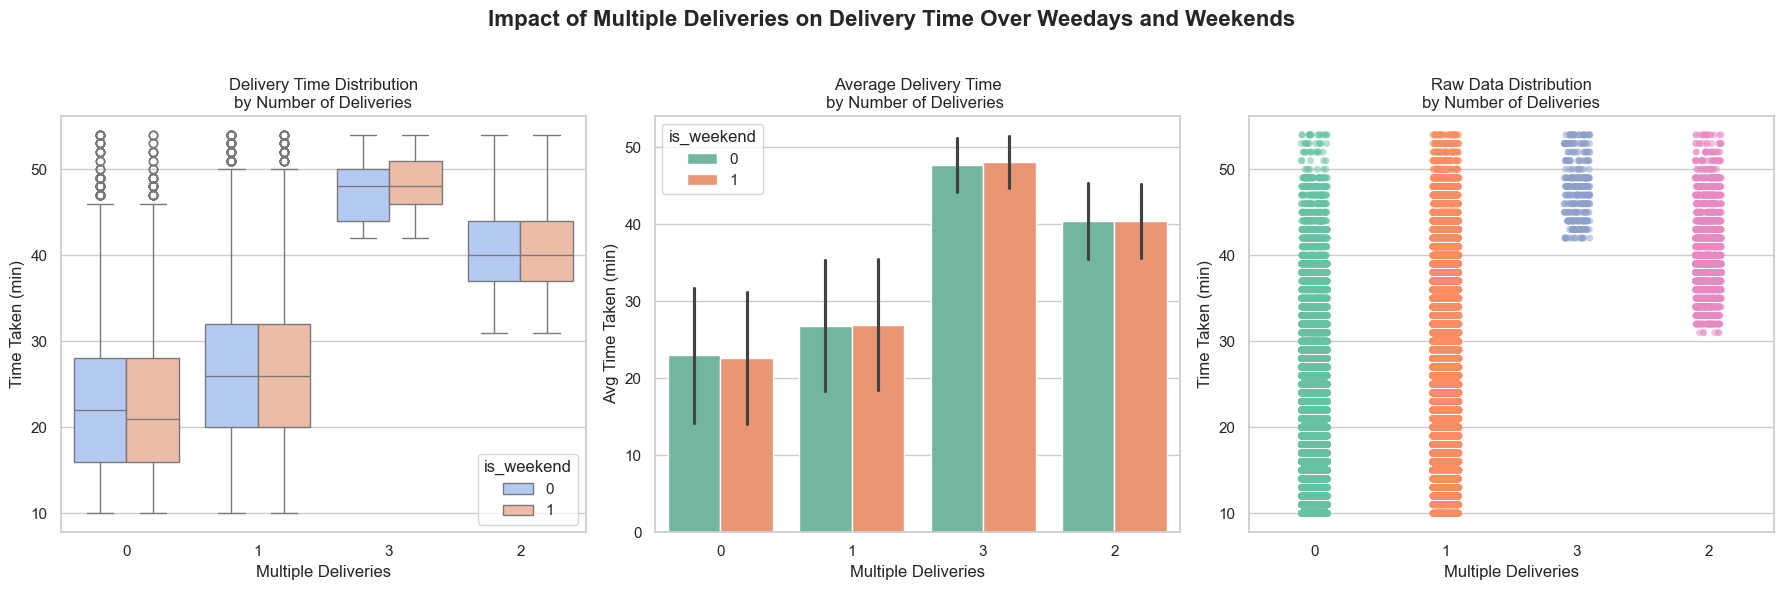

In [34]:
# Set the plot style
sns.set(style="whitegrid", palette="Set2")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# 1️⃣ Boxplot - distribution
sns.boxplot(
    x='multiple_deliveries',
    y='Time_taken(min)',
    data=df,
    ax=axes[0],
    palette="coolwarm",hue=df['is_weekend']
)

axes[0].set_title("Delivery Time Distribution\nby Number of Deliveries")
axes[0].set_xlabel("Multiple Deliveries")
axes[0].set_ylabel("Time Taken (min)")

# 2️⃣ Barplot - average time
sns.barplot(
    x='multiple_deliveries',
    y='Time_taken(min)',
    data=df,
    estimator='mean',
    ci='sd',
    ax=axes[1],
    palette="Set2",hue=df['is_weekend']
)
axes[1].set_title("Average Delivery Time\nby Number of Deliveries ")
axes[1].set_xlabel("Multiple Deliveries")
axes[1].set_ylabel("Avg Time Taken (min)")

# 3️⃣ Stripplot - individual data points
sns.stripplot(
    x='multiple_deliveries',
    y='Time_taken(min)',
    data=df,
    ax=axes[2],
    palette="Set2",
    jitter=True,
    alpha=0.5
)
axes[2].set_title("Raw Data Distribution\nby Number of Deliveries")
axes[2].set_xlabel("Multiple Deliveries")
axes[2].set_ylabel("Time Taken (min)")

plt.suptitle("Impact of Multiple Deliveries on Delivery Time Over Weedays and Weekends", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Insights:**

**1. Delivery Time Distribution by Number of Deliveries:**
- **Boxplot Representation:** The plot displays the distribution of delivery times for various numbers of deliveries (0 to 3).
- **Weekday vs Weekend**: Delivery times are differentiated by color (weekdays in blue and weekends in orange), showing that weekends typically have longer delivery times.

**2. Average Delivery Time by Number of Deliveries:**
- **Bar Chart:** This graph illustrates the average delivery times for different quantities of deliveries.
- **Comparison of Weekdays and Weekends:** Average delivery times are higher on weekends for 1 and 3 deliveries, indicating increased delivery times during these periods.

**3. Raw Data Distribution by Number of Deliveries:**
- **Dot Plot:** The plot presents raw delivery time data, showcasing individual delivery times categorized by the number of deliveries.
- **Data Points:** Each delivery count has scattered points indicating that delivery times vary widely, particularly for 1 and 3 deliveries.

## 📏 Distance vs Time_taken(min)

### 📌 Question: Is the relationship between distance and time linear, or does it exhibit thresholds due to urban/rural splits?

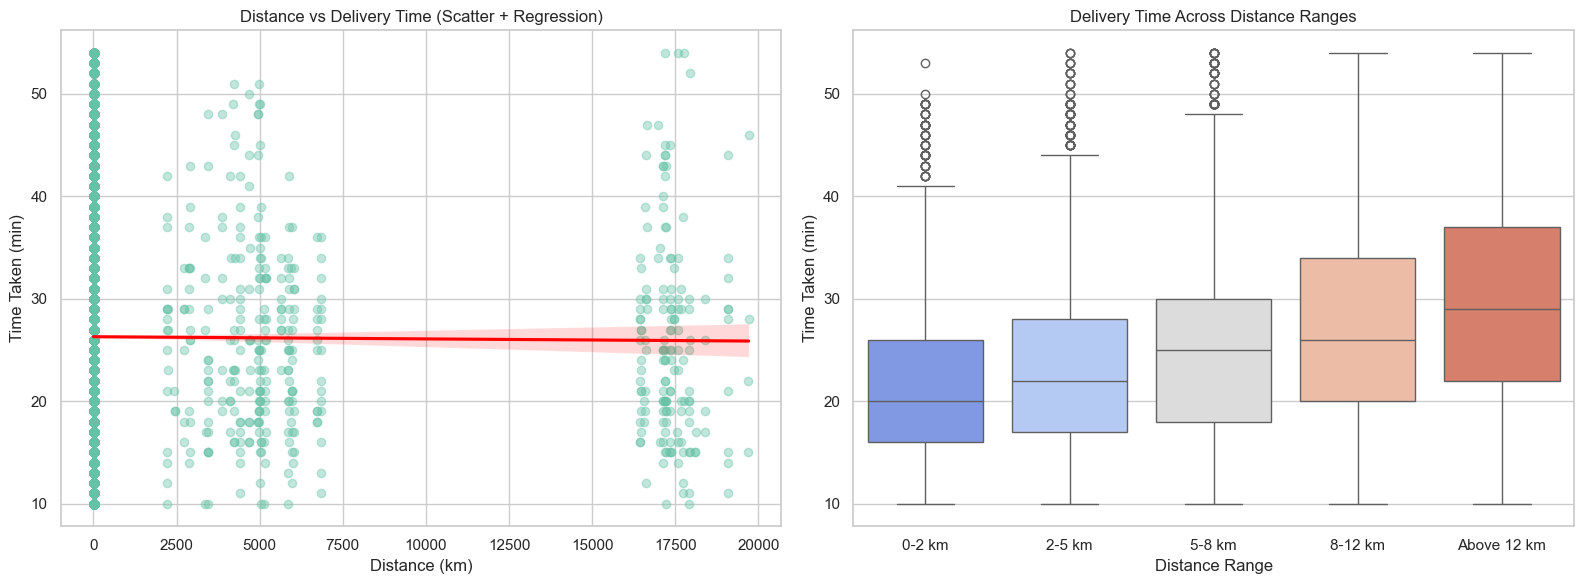

In [35]:
# --------------------------
# 1. Calculate Distance in KM
# --------------------------
def calculate_distance(row):
    pickup = (row['Restaurant_latitude'], row['Restaurant_longitude'])
    drop = (row['Delivery_location_latitude'], row['Delivery_location_longitude'])
    return geodesic(pickup, drop).km

df['Distance_km'] = df.apply(calculate_distance, axis=1)

# Create distance bins
bins = [0, 2, 5, 8, 12, float('inf')]
labels = ['0-2 km', '2-5 km', '5-8 km', '8-12 km', 'Above 12 km']
df['Distance_Range'] = pd.cut(df['Distance_km'], bins=bins, labels=labels, right=False)

# --------------------------
# 2. Create Subplots
# --------------------------
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter Plot with Regression
sns.regplot(
    data=df, x='Distance_km', y='Time_taken(min)', 
    scatter_kws={'alpha': 0.4}, line_kws={'color': 'red'}, ax=axes[0]
)
axes[0].set_title('Distance vs Delivery Time (Scatter + Regression)')
axes[0].set_xlabel('Distance (km)')
axes[0].set_ylabel('Time Taken (min)')
axes[0].grid(True)

# Binned Boxplot
sns.boxplot(
    data=df, x='Distance_Range', y='Time_taken(min)', 
    palette='coolwarm', ax=axes[1]
)
axes[1].set_title('Delivery Time Across Distance Ranges')
axes[1].set_xlabel('Distance Range')
axes[1].set_ylabel('Time Taken (min)')
axes[1].grid(True, axis='y')

plt.tight_layout()
plt.show()



**Insights:**
**Distance vs. Delivery Time (Scatter + Regression)**

**General Trend:**
-  The scatter plot shows the relationship between distance (in km) and time taken (in minutes) for deliveries.
- The red line represents a regression line, indicating minimal variation in time taken across increasing distances, suggesting that distance does    not significantly affect delivery times.

**Observations:**
- Delivery times mostly range from 10 to around 50 minutes, regardless of distance.
- There are clusters of data points concentrated mainly between 0 km and 10,000 km, with fewer data points as distance increases.

**2. Delivery Time Across Distance Ranges (Box Plot)**

**Distance Ranges:**
- The box plot represents various distance ranges (0-2 km, 2-5 km, 5-8 km, 8-12 km, and above 12 km).

**Key Insights:**
- 0-2 km: Has the lowest median delivery time, indicating quick deliveries.
- 2-5 km and 5-8 km: Show increased median times but remain relatively low.
- 8-12 km and Above 12 km: Display slightly higher medians, but not significantly different from previous ranges.
- The variability (shown by the interquartile range) remains consistent across most distance ranges.

Distance has a minimal effect on delivery time, with most deliveries completed in a short time frame, regardless of the distance category.

In [36]:
# summary stats
avg_time_by_range = df.groupby('Distance_Range')['Time_taken(min)'].mean().reset_index()
print("\nAverage Delivery Time by Distance Range:")
print(avg_time_by_range)


Average Delivery Time by Distance Range:
  Distance_Range  Time_taken(min)
0         0-2 km        21.424399
1         2-5 km        22.508158
2         5-8 km        24.644365
3        8-12 km        27.155057
4    Above 12 km        29.688661


## 🌧️ Weather × 🚦 Traffic Density

### How do weather and traffic interact to affect delivery time?

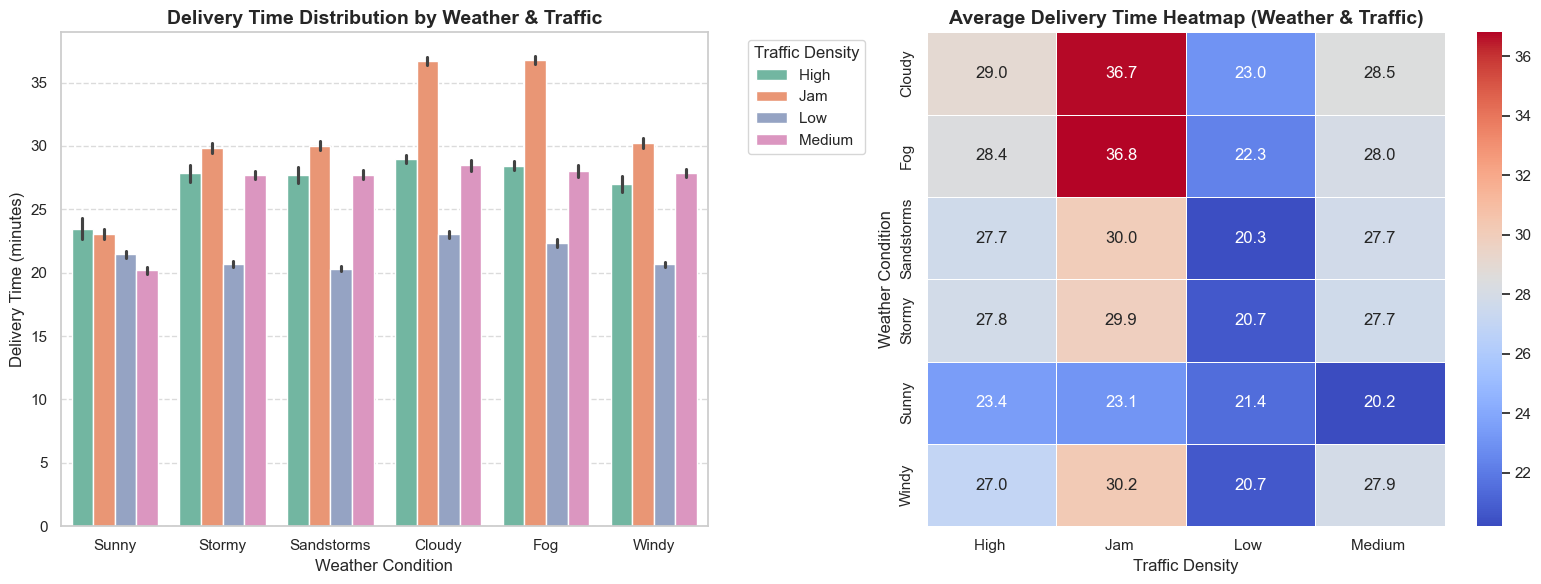

In [37]:
# --- Prepare pivot table for heatmap ---
pivot_table = df.pivot_table(
    index='Weather_conditions',
    columns='Road_traffic_density',
    values='Time_taken(min)',
    aggfunc='mean'
)

# --- Create subplots ---
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- 1️⃣ Grouped Boxplot ---
sns.barplot(
    data=df,
    x='Weather_conditions',
    y='Time_taken(min)',
    hue='Road_traffic_density',
    palette='Set2',
    ax=axes[0]
)
axes[0].set_title("Delivery Time Distribution by Weather & Traffic", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Weather Condition", fontsize=12)
axes[0].set_ylabel("Delivery Time (minutes)", fontsize=12)
axes[0].legend(title="Traffic Density", bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- 2️⃣ Heatmap ---
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".1f",
    cmap='coolwarm',
    linewidths=0.5,
    ax=axes[1]
)
axes[1].set_title("Average Delivery Time Heatmap (Weather & Traffic)", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Traffic Density", fontsize=12)
axes[1].set_ylabel("Weather Condition", fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()

##  **Insights:**

- **Left chart (bar plot)** — Shows the distribution of delivery times by weather condition, broken down by traffic density levels (High, Jam, Low, Medium).
- **Right chart (heatmap)** — Shows the average delivery times in minutes for each weather–traffic combination, with color intensity representing speed (red = longer times, blue = shorter times).
- Worst delays occur during Cloudy and Foggy weather with traffic jams, averaging ~36.7–36.8 minutes.
- Fastest deliveries happen on Sunny days with Low or Medium traffic, averaging ~20–21 minutes.
- Stormy, Sandstorm, and Windy conditions cause moderate delays, especially when traffic is jammed.
- Traffic jams consistently add significant time across all weather conditions compared to low or medium traffic.


## 🏙️ City × 🚦 Traffic

### 📌 Question: How does traffic affect delivery time across cities?

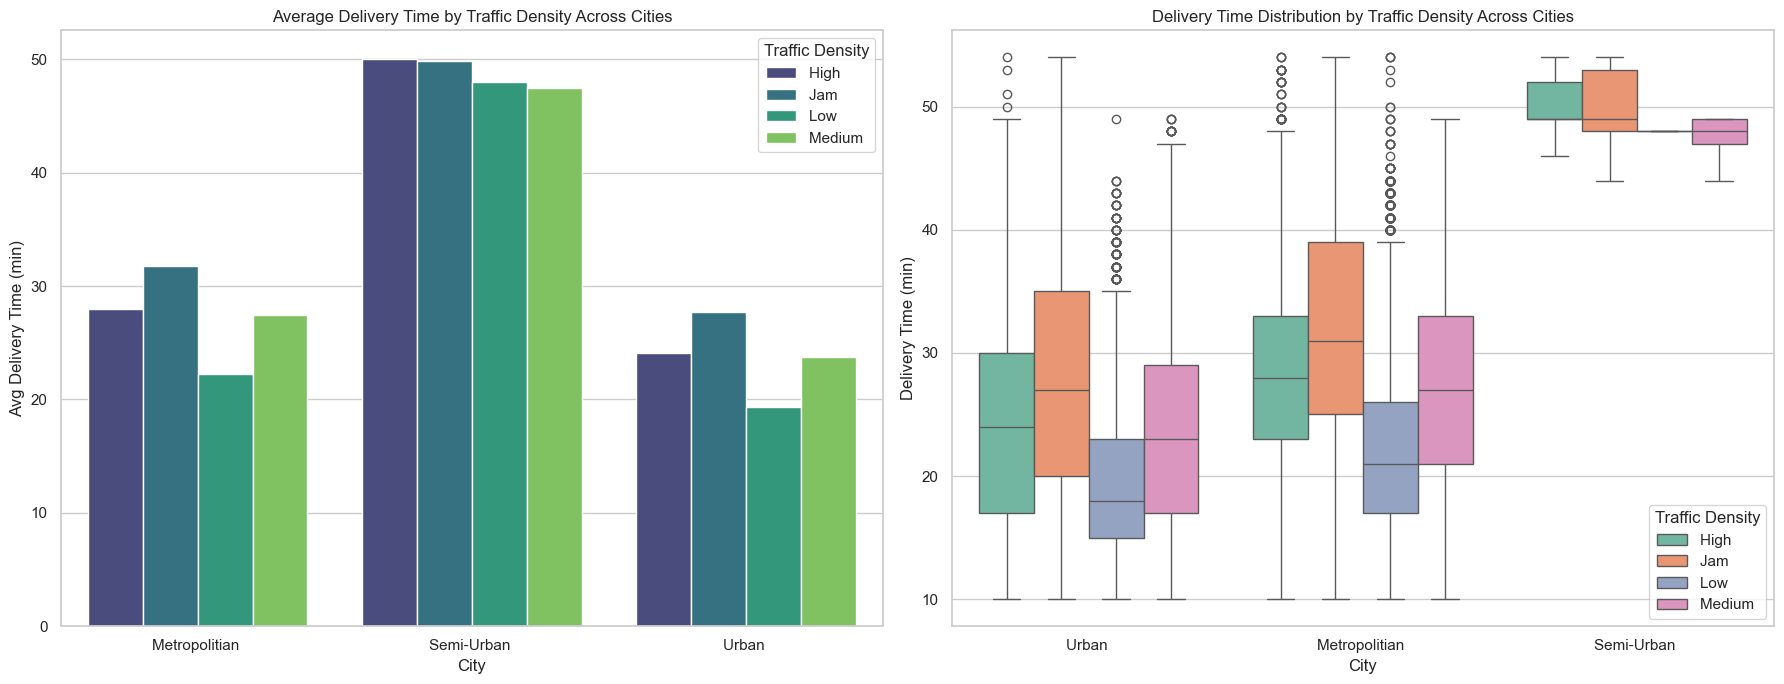

In [38]:
plt.figure(figsize=(18, 7))

# 1️⃣ Grouped Barplot: Avg delivery time by city and traffic density
plt.subplot(1, 2, 1)
avg_time = df.groupby(['City', 'Road_traffic_density'])['Time_taken(min)'].mean().reset_index()
sns.barplot(
    data=avg_time, 
    x='City', y='Time_taken(min)', 
    hue='Road_traffic_density', 
    palette='viridis'
)
plt.title('Average Delivery Time by Traffic Density Across Cities')
plt.xlabel('City')
plt.ylabel('Avg Delivery Time (min)')
plt.legend(title='Traffic Density')

# 2️⃣ Boxplot: Distribution of delivery times by city and traffic density
plt.subplot(1, 2, 2)
sns.boxplot(
    data=df, 
    x='City', y='Time_taken(min)', 
    hue='Road_traffic_density', 
    palette='Set2'
)
plt.title('Delivery Time Distribution by Traffic Density Across Cities')
plt.xlabel('City')
plt.ylabel('Delivery Time (min)')
plt.legend(title='Traffic Density', loc='lower right')

plt.tight_layout()
plt.show()


## **Insights**
- Semi-Urban areas have the highest average delivery times (~48–50 min) across all traffic densities.
- Urban areas show the lowest average delivery times, especially with Low traffic (~19 min).
- Metropolitan areas have moderate averages (~22–32 min), with traffic jams adding ~10 extra minutes.
- Across all city types, traffic jams significantly increase delivery times and create more variability in delivery durations.

# Data Preprocessing

## Label Encoding

In [39]:
def label_encoding(df):
    categorical_columns = df.select_dtypes(include='object').columns
    label_encoder = LabelEncoder()
    df[categorical_columns] = df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))
    
label_encoding(df)
df.head()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,...,is_quarter_end,is_year_start,is_year_end,is_weekend,order_prepare_time,distance,Age_Group,Rating_category,Distance_km,Distance_Range
0,37,4.9,22.745049,75.892471,22.765049,75.912471,4,0,2,3,...,0,0,0,1,15.0,3,28-38,2,3.020737,2-5 km
1,34,4.5,12.913041,77.683237,13.043041,77.813237,3,1,2,3,...,0,0,0,0,5.0,20,28-38,2,20.143737,Above 12 km
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2,2,0,1,...,0,0,0,1,15.0,1,18-28,2,1.549693,0-2 km
3,38,4.7,11.003669,76.976494,11.053669,77.026494,4,3,0,0,...,0,0,0,0,10.0,7,38-48,2,7.774497,5-8 km
4,32,4.6,12.972793,80.249982,13.012793,80.289982,0,0,1,3,...,0,0,0,1,15.0,6,28-38,2,6.197898,5-8 km


In [40]:
categorical_columns = df.select_dtypes(include = 'category').columns.to_list()
df_new=df.drop(categorical_columns,axis=1)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   Delivery_person_Age          45593 non-null  Int64   
 1   Delivery_person_Ratings      45593 non-null  float64 
 2   Restaurant_latitude          45593 non-null  float64 
 3   Restaurant_longitude         45593 non-null  float64 
 4   Delivery_location_latitude   45593 non-null  float64 
 5   Delivery_location_longitude  45593 non-null  float64 
 6   Weather_conditions           45593 non-null  int64   
 7   Road_traffic_density         45593 non-null  int64   
 8   Vehicle_condition            45593 non-null  int64   
 9   Type_of_order                45593 non-null  int64   
 10  Type_of_vehicle              45593 non-null  int64   
 11  multiple_deliveries          45593 non-null  int64   
 12  Festival                     45593 non-null  int64   
 13  C

In [42]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken(min)', 'City_code', 'multi_deliveries', 'day', 'month',
       'quarter', 'year', 'day_of_week', 'is_month_start', 'is_month_end',
       'is_quarter_start', 'is_quarter_end', 'is_year_start', 'is_year_end',
       'is_weekend', 'order_prepare_time', 'distance', 'Age_Group',
       'Rating_category', 'Distance_km', 'Distance_Range'],
      dtype='object')

## Train test split

In [43]:
#Split features & label
X = df_new.drop('Time_taken(min)', axis=1)  # Features
y = df_new['Time_taken(min)']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(36474, 32)
(36474,)
(9119, 32)
(9119,)


## Standardization

In [44]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Perform standardization on the training data
X_train = scaler.transform(X_train)

# Perform standardization on the testing data
X_test = scaler.transform(X_test)

# Model Building

### Steps
1. Employ cross-validation & hyper parameter tuning to determine the optimal regression model.
2. Construct the food delivery prediction model using the identified best model.
3. Evaluate the model's performance on the testing data to assess its accuracy and reliability.

### Cross Validation

In [45]:
# find the best model
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    xgb.XGBRFRegressor()
]


param_grids=[
    {},
    {'max_depth': [3,5,7]},
    {'n_estimators':[100,200,300]},
    {'n_estimators':[20,25,30],'max_depth':[5,7,9]},
]

for i, model in enumerate(models):
    grid_search = GridSearchCV(model,param_grids[i],cv=5,n_jobs=-1,scoring='r2')
    grid_search.fit(X_train,y_train)

    print(f"{model.__class__.__name__}:")
    print("Best Parameters:",grid_search.best_params_)
    print("Best R2Score:",grid_search.best_score_)
    print()

LinearRegression:
Best Parameters: {}
Best R2Score: 0.43391714759867206

DecisionTreeRegressor:
Best Parameters: {'max_depth': 7}
Best R2Score: 0.731896384558789

RandomForestRegressor:
Best Parameters: {'n_estimators': 300}
Best R2Score: 0.814530083429333

XGBRFRegressor:
Best Parameters: {'max_depth': 9, 'n_estimators': 30}
Best R2Score: 0.8089858531951905



# Model Building

In [46]:
# Create a XGB regressor model
model = xgb.XGBRegressor(n_estimators=20,max_depth=9)

# Fit the model on the training data
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=20, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Model Evaluation

In [47]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae,2))
print("Mean Squared Error (MSE):", round(mse,2))
print("Root Mean Squared Error (RMSE):", round(rmse,2))
print("R-squared (R2) Score:", round(r2,2))

Mean Absolute Error (MAE): 3.17
Mean Squared Error (MSE): 15.98
Root Mean Squared Error (RMSE): 4.0
R-squared (R2) Score: 0.82


# Conclusion

**In conclusion, the food delivery prediction model was developed using XGBoost, achieving an impressive R2 score of 0.82. Moving forward, potential enhancements include identifying the best features, conducting additional feature engineering, and exploring other optimization techniques to further improve the model's performance and accuracy. These steps will contribute to fine-tuning the model and unlocking its full potential in predicting food delivery timings accurately.**

In [48]:
import pickle

# Define the filename
filename = 'model.pkl'

# Save the model using pickle
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {filename}")


Model saved to model.pkl


In [49]:
# Define the filename
filename_scaler = 'scaler.pkl'

# Save the model using pickle
with open(filename_scaler, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Model saved to {filename_scaler}")

Model saved to scaler.pkl


In [56]:
import pypandoc
pypandoc.download_pandoc()
output = pypandoc.convert_file('EDA_Food_Delivery.ipynb', 'docx', outputfile='Report.docx')
print("✅ Notebook converted to output.docx")


✅ Notebook converted to output.docx
